In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage,dendrogram,fcluster

In [32]:
df=pd.read_excel("Online Retail.xlsx")[:20000]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
19995,C537998,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-4,2010-12-09 11:42:00,3.75,17411.0,United Kingdom
19996,537999,22034,NaN,-223,2010-12-09 11:44:00,0.00,NaN,United Kingdom
19997,538000,22942,CHRISTMAS LIGHTS 10 SANTAS,5,2010-12-09 11:44:00,8.50,12748.0,United Kingdom
19998,538000,79321,CHILLI LIGHTS,12,2010-12-09 11:44:00,4.95,12748.0,United Kingdom


## Data Preparation,Exploratory Data Analysis And Feature Engineering

In [33]:
df.isna().sum()

InvoiceNo         0
StockCode         0
Description      71
Quantity          0
InvoiceDate       0
UnitPrice         0
CustomerID     6653
Country           0
dtype: int64

In [49]:
df_prep=df.drop(["Description","InvoiceNo"],axis=1)
df_prep

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
19995,22725,-4,2010-12-09 11:42:00,3.75,17411.0,United Kingdom
19996,22034,-223,2010-12-09 11:44:00,0.00,NaN,United Kingdom
19997,22942,5,2010-12-09 11:44:00,8.50,12748.0,United Kingdom
19998,79321,12,2010-12-09 11:44:00,4.95,12748.0,United Kingdom


In [50]:
mode=df_prep["CustomerID"].mode()[0]
df_prep["CustomerID"]=df_prep["CustomerID"].fillna(mode)
df_prep

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,71053,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,84406B,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,84029G,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,84029E,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...
19995,22725,-4,2010-12-09 11:42:00,3.75,17411.0,United Kingdom
19996,22034,-223,2010-12-09 11:44:00,0.00,12748.0,United Kingdom
19997,22942,5,2010-12-09 11:44:00,8.50,12748.0,United Kingdom
19998,79321,12,2010-12-09 11:44:00,4.95,12748.0,United Kingdom


## Label Encoding

In [51]:
mapping={invoice:idx for idx,invoice in enumerate(df_prep["StockCode"].unique())}
mapping2={invoice:idx for idx,invoice in enumerate(df_prep["Country"].unique())}
df_prep["StockCode"]=df_prep["StockCode"].map(mapping)
df_prep["Country"]=df_prep["Country"].map(mapping2)

In [52]:
df_prep

,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,6,2010-12-01 08:26:00,2.55,17850.0,0
1,1,6,2010-12-01 08:26:00,3.39,17850.0,0
2,2,8,2010-12-01 08:26:00,2.75,17850.0,0
3,3,6,2010-12-01 08:26:00,3.39,17850.0,0
4,4,6,2010-12-01 08:26:00,3.39,17850.0,0
...,...,...,...,...,...,...
19995,1136,-4,2010-12-09 11:42:00,3.75,17411.0,0
19996,1942,-223,2010-12-09 11:44:00,0.00,12748.0,0
19997,417,5,2010-12-09 11:44:00,8.50,12748.0,0
19998,141,12,2010-12-09 11:44:00,4.95,12748.0,0


In [53]:
df_prep.isna().sum()

StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [54]:
mapping3={invoice:idx for idx,invoice in enumerate(df_prep["CustomerID"].unique())}
df_prep["CustomerID"]=df_prep["CustomerID"].map(mapping3)

In [55]:
df_prep=df_prep.drop("InvoiceDate",axis=1)

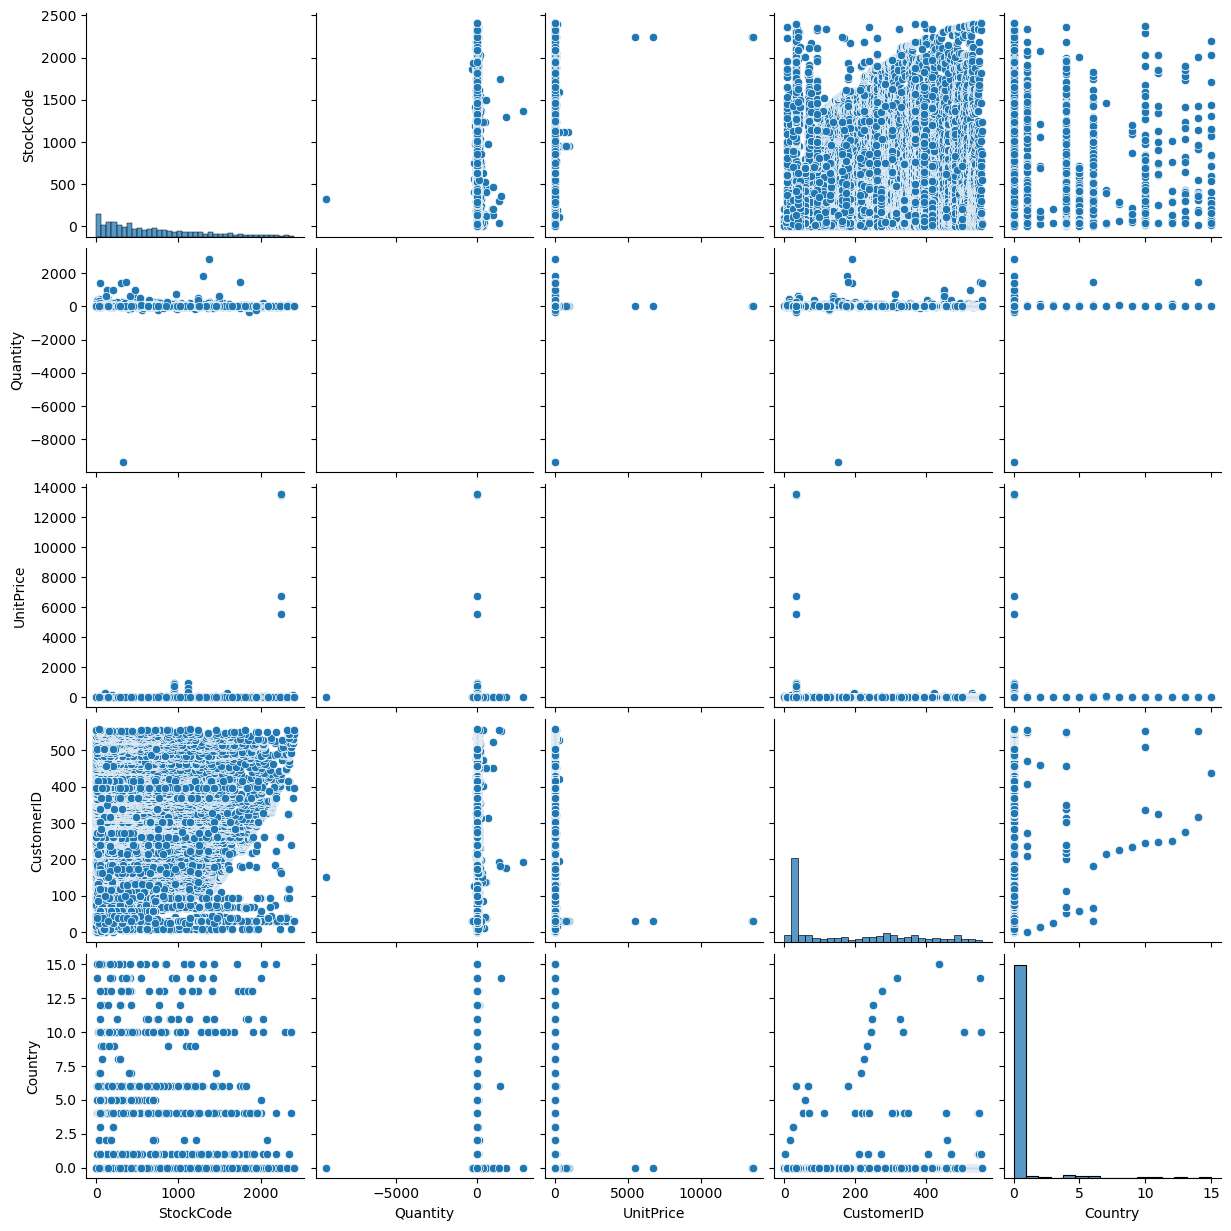

In [41]:
import seaborn as sns
sns.pairplot(df_prep)

## MODEL SELECTION AND TRAINING

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import AgglomerativeClustering


In [58]:
scale=StandardScaler()
df_prep[df_prep.columns]=scale.fit_transform(df_prep)
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country
0,-1.186113,-0.022593,-0.025236,-1.075845,-0.186406
1,-1.184405,-0.022593,-0.021076,-1.075845,-0.186406
2,-1.182696,0.002995,-0.024246,-1.075845,-0.186406
3,-1.180988,-0.022593,-0.021076,-1.075845,-0.186406
4,-1.179279,-0.022593,-0.021076,-1.075845,-0.186406
...,...,...,...,...,...
19995,0.754824,-0.150537,-0.019293,2.274034,-0.186406
19996,2.131932,-2.952491,-0.037866,-0.883737,-0.186406
19997,-0.473639,-0.035388,0.004234,-0.883737,-0.186406
19998,-0.945205,0.054172,-0.013349,-0.883737,-0.186406


In [59]:
sse=[]
for i in range(1,20):
    model=KMeans(n_clusters=i,random_state=42,n_init="auto")
    model.fit(df_prep)
    sse.append(model.inertia_)

sse

[100000.00000000022,
 83430.59083183281,
 69068.84470151825,
 51113.0534625244,
 40447.71009222849,
 25609.697208313883,
 21822.067764089676,
 19970.039565982854,
 18543.657464948574,
 14813.837696624978,
 11434.459648868235,
 11079.921716056157,
 9249.523076491349,
 8426.85221876271,
 7883.263674844678,
 7470.826167689976,
 6777.469767768193,
 6435.294293900508,
 6218.86525665873]

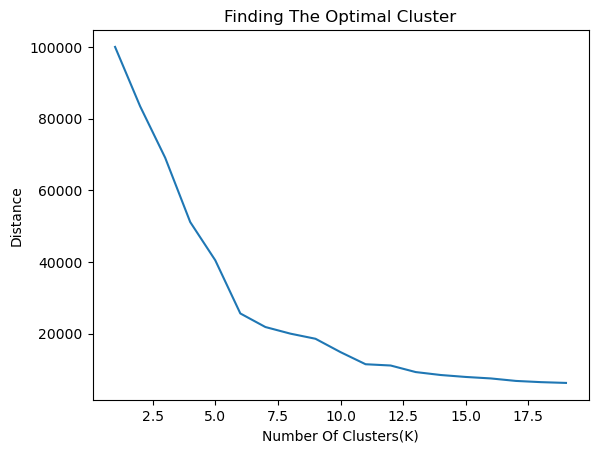

In [60]:
plt.plot(range(1,20),sse)
plt.xlabel("Number Of Clusters(K)")
plt.ylabel("Distance")
plt.title("Finding The Optimal Cluster")
plt.show()

In [61]:
model_kms=KMeans(n_clusters=6,n_init="auto",random_state=42)
model_kms.fit(df_prep)
labels=model_kms.labels_

In [64]:
df["ClusterKM"]=labels
df_prep["ClusterKM"]=labels

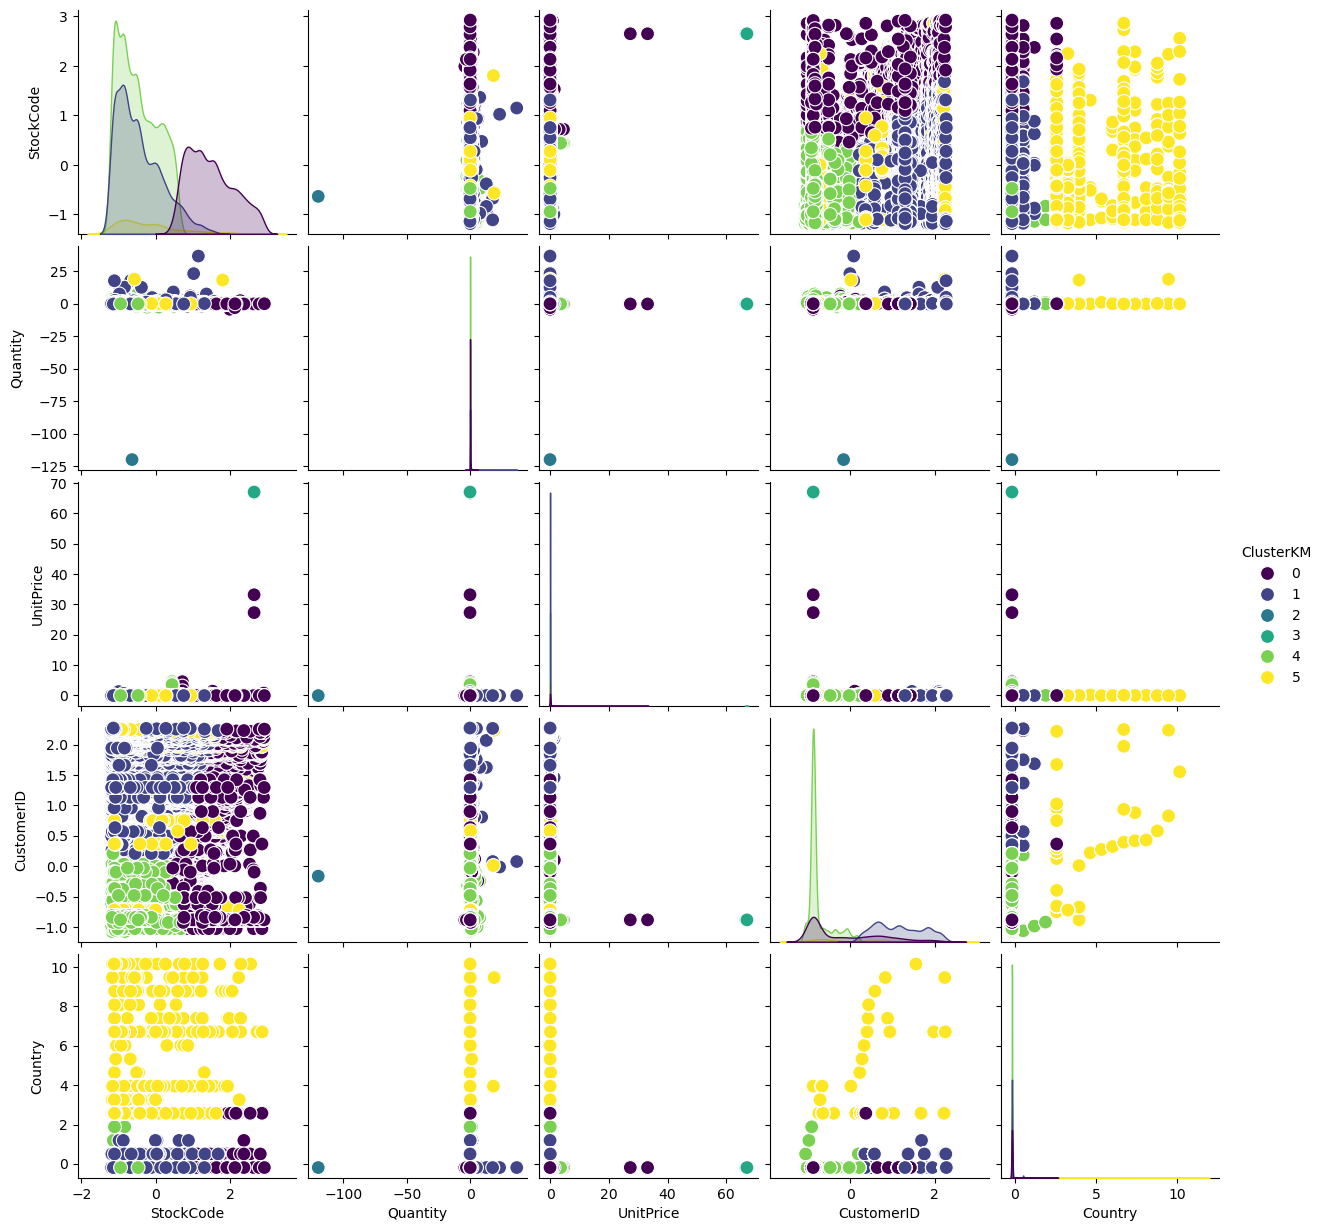

In [65]:
sns.pairplot(df_prep,hue="ClusterKM",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

In [48]:
df_prep

,StockCode,Quantity,UnitPrice,CustomerID,Country,ClusterKM
0,0,6,2.55,0,0,1
1,1,6,3.39,0,0,1
2,2,8,2.75,0,0,1
3,3,6,3.39,0,0,1
4,4,6,3.39,0,0,1
...,...,...,...,...,...,...
19995,1136,-4,3.75,558,0,0
19996,1942,-223,0.00,32,0,3
19997,417,5,8.50,32,0,2
19998,141,12,4.95,32,0,1


## Applying Aggloromorative Clustering

In [76]:
model_hrc=AgglomerativeClustering(n_clusters=6)
model_hrc.fit(df_prep.drop("ClusterKM",axis=1))
label2=model_hrc.labels_

In [77]:
df["ClusterHC"]=label2

In [81]:
df[["ClusterKM","ClusterHC"]][df["ClusterKM"]==1]

,ClusterKM,ClusterHC
4850,1,2
4945,1,2
4946,1,2
5266,1,4
5267,1,4
...,...,...
19980,1,2
19981,1,4
19982,1,4
19994,1,4


In [82]:
df_prep2=df_prep.drop("ClusterKM",axis=1)
df_prep2["ClusterHC"]=label2

In [83]:
df_prep2

,StockCode,Quantity,UnitPrice,CustomerID,Country,ClusterHC
0,-1.186113,-0.022593,-0.025236,-1.075845,-0.186406,5
1,-1.184405,-0.022593,-0.021076,-1.075845,-0.186406,5
2,-1.182696,0.002995,-0.024246,-1.075845,-0.186406,5
3,-1.180988,-0.022593,-0.021076,-1.075845,-0.186406,5
4,-1.179279,-0.022593,-0.021076,-1.075845,-0.186406,5
...,...,...,...,...,...,...
19995,0.754824,-0.150537,-0.019293,2.274034,-0.186406,0
19996,2.131932,-2.952491,-0.037866,-0.883737,-0.186406,0
19997,-0.473639,-0.035388,0.004234,-0.883737,-0.186406,5
19998,-0.945205,0.054172,-0.013349,-0.883737,-0.186406,5


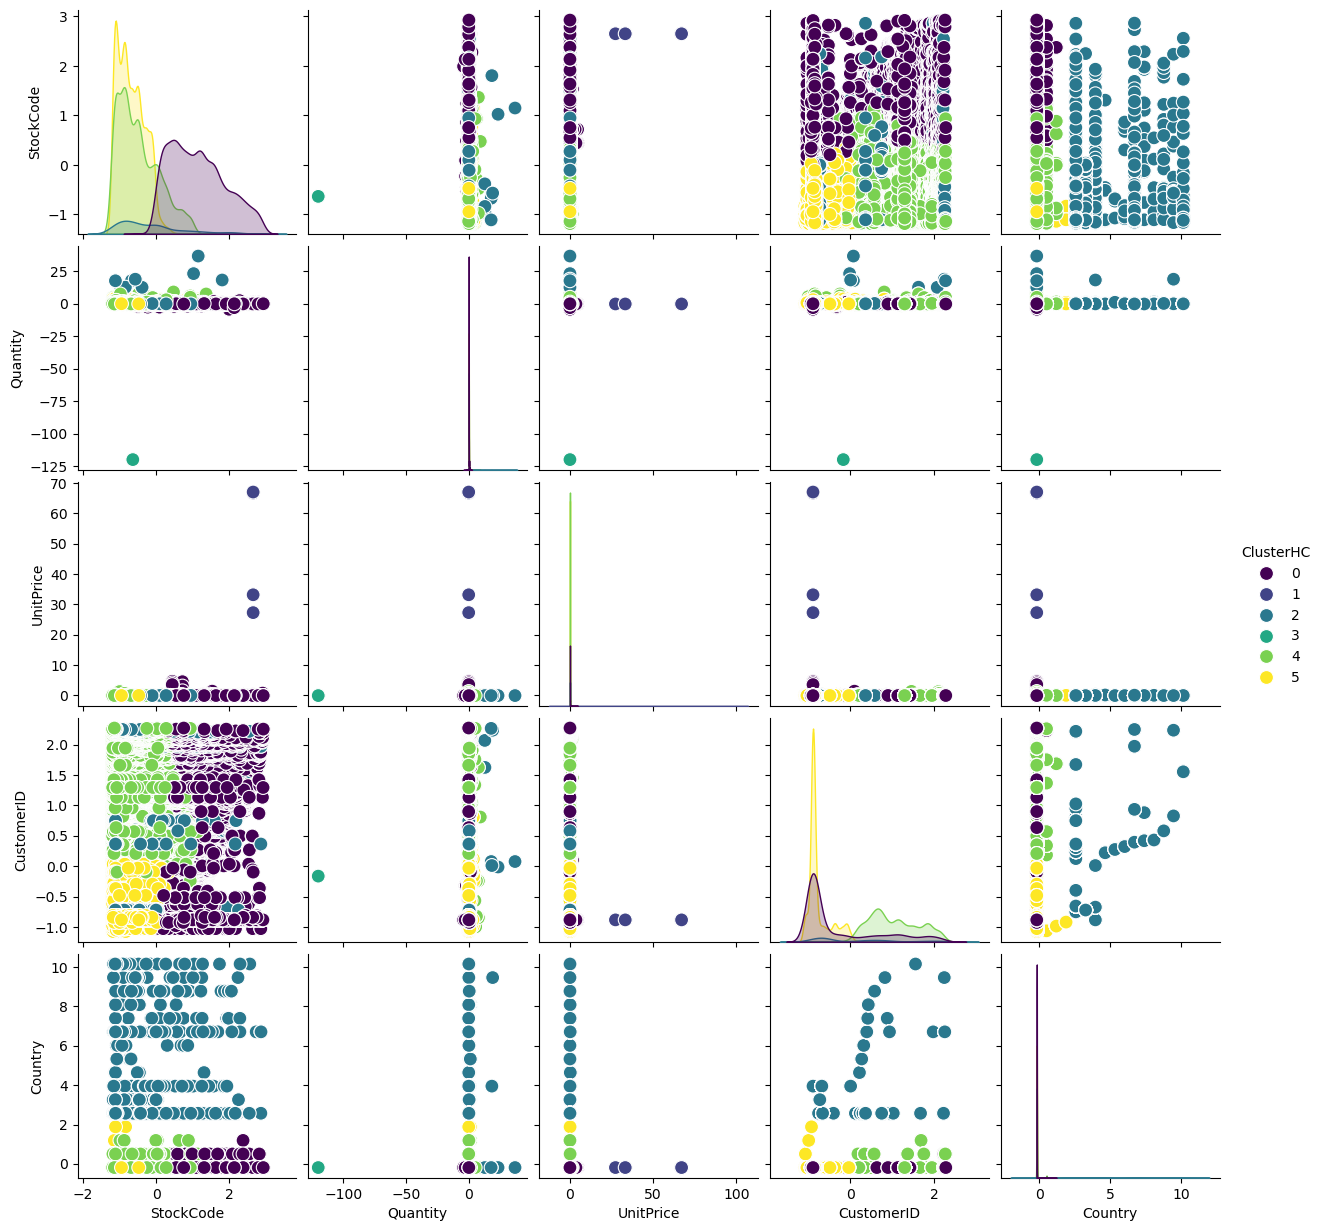

In [85]:
sns.pairplot(df_prep2,hue="ClusterHC",palette="viridis",diag_kind='kde', plot_kws={'s': 100})

In [86]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,ClusterKM,ClusterHC
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,4,5
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4,5
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,4,5
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4,5
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,4,5
...,...,...,...,...,...,...,...,...,...,...
19995,C537998,22725,ALARM CLOCK BAKELIKE CHOCOLATE,-4,2010-12-09 11:42:00,3.75,17411.0,United Kingdom,1,0
19996,537999,22034,NaN,-223,2010-12-09 11:44:00,0.00,NaN,United Kingdom,0,0
19997,538000,22942,CHRISTMAS LIGHTS 10 SANTAS,5,2010-12-09 11:44:00,8.50,12748.0,United Kingdom,4,5
19998,538000,79321,CHILLI LIGHTS,12,2010-12-09 11:44:00,4.95,12748.0,United Kingdom,4,5


In [ ]:
## ADDING THE PREDICTION MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier